In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
# 1. Lendo o arquivo CSV (substitua pelo seu caminho)
caminho_arquivo = '../../Bases/Criados/base_preenchida.csv' 
df = pd.read_csv(caminho_arquivo)

# 2. Carregar o dicionário de dados
dic = pd.read_csv('../../Bases/Originais/PNS_titulos.csv', sep=';', encoding='latin1')

# 3. Verificando as primeiras linhas (opcional)
print(df.head())

   V0026  V0031  B001  C006  C008  C009  C011  E006011  E008  E011  ...  \
0      1      1   1.0   1.0  81.0   4.0   3.0      0.0   0.0   NaN  ...   
1      1      1   2.0   2.0  54.0   4.0   3.0      0.0   0.0   1.0  ...   
2      1      1   2.0   2.0  41.0   2.0   1.0      0.0   0.0   1.0  ...   
3      1      1   2.0   1.0  62.0   1.0   2.0      0.0   0.0   1.0  ...   
4      1      1   2.0   2.0  51.0   4.0   1.0      0.0   0.0   NaN  ...   

   Exposicao_ruido  Exposicao_lixo  Exposicao_minerio      Dor_peito  \
0                2               2                  2  Não sente dor   
1                2               2                  2  Não sente dor   
2                2               2                  2  Não sente dor   
3                2               2                  2  Não sente dor   
4                2               2                  2  Não sente dor   

   Faixa_ex_fisico     Inicio_tabagismo  Tempo_parou_fumar  Intensidade_fumo  \
0            5-10h  Início antes dos

Colunas com outliers: ['C008', 'C009', 'E006011', 'E008', 'E011', 'F007011', 'F008011', 'VDF001', 'C00301', 'J001', 'J00101', 'J002', 'J00402', 'J00404', 'J01101', 'M00203', 'N00101', 'N010', 'N011', 'N012', 'N016', 'P00103', 'P00104', 'P00403', 'P00404', 'P02001', 'P02002', 'P02501', 'P02602', 'P02601', 'P06701', 'P068', 'Q03001', 'Q060', 'Q06306', 'Q06307', 'Q06308', 'Q06309', 'Q06310', 'Q06311', 'Q064', 'Q06506', 'Q06507', 'Q06508', 'Q06509', 'Q06601', 'Q067', 'Q068', 'Q11006', 'Q128', 'T001', 'H003', 'H004', 'H010', 'Renda', 'Quant_trabalhos', 'Horas_trabalhadas', 'Mobilidade_auxiliar', 'Plano_publico', 'Cobertura_plano', 'Exposicao_quimica', 'Exposicao_ruido', 'Exposicao_lixo', 'Exposicao_minerio', 'Intensidade_fumo', 'Doses_semanais']


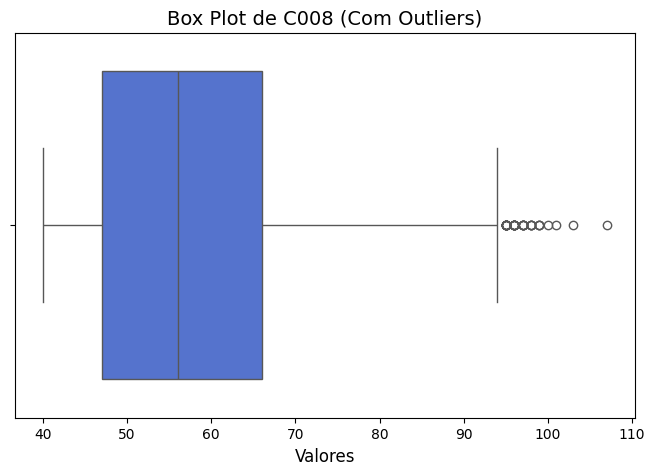

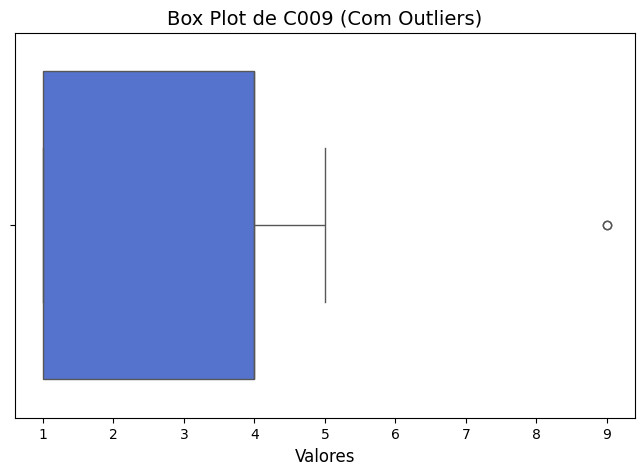

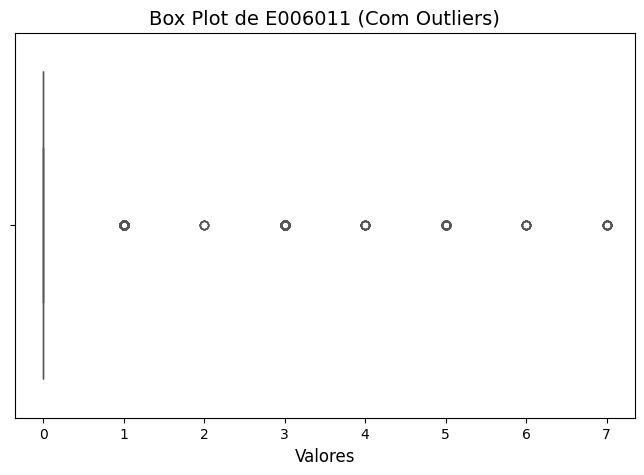

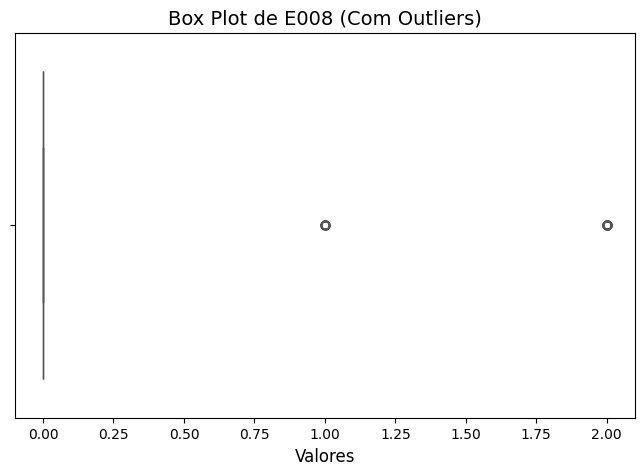

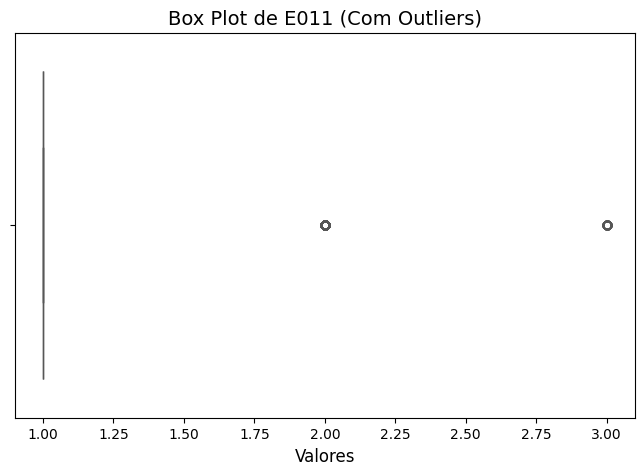

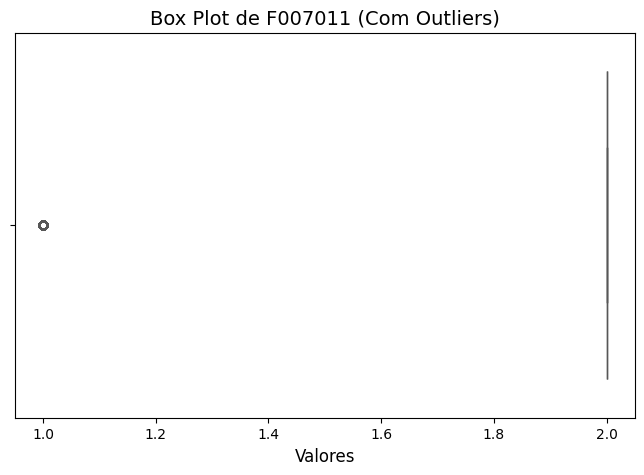

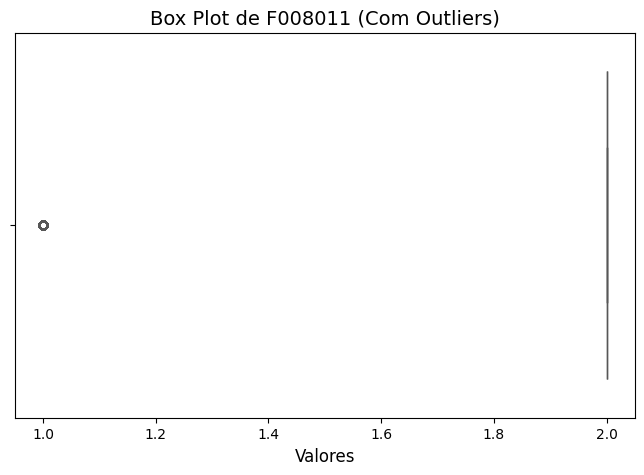

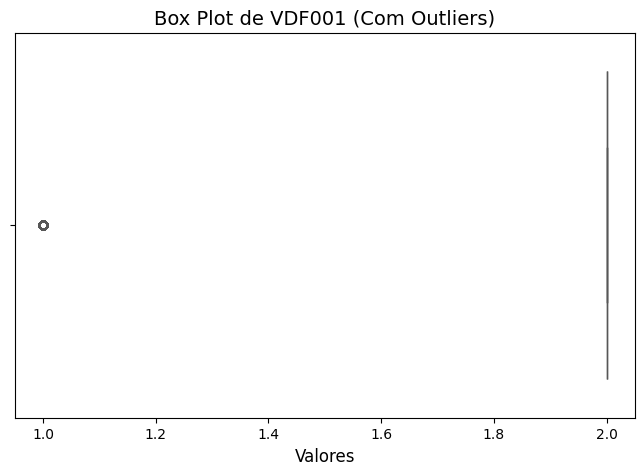

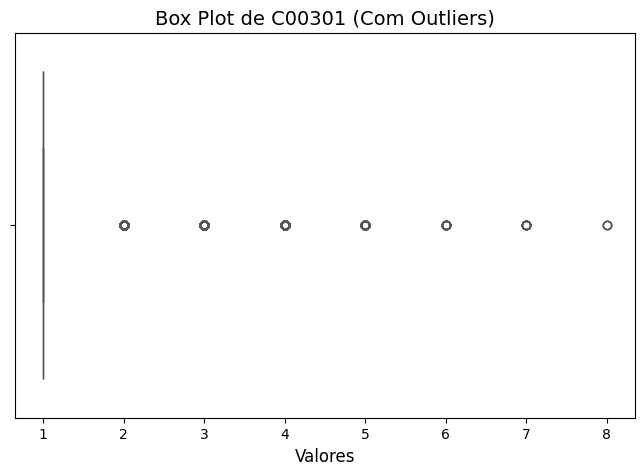

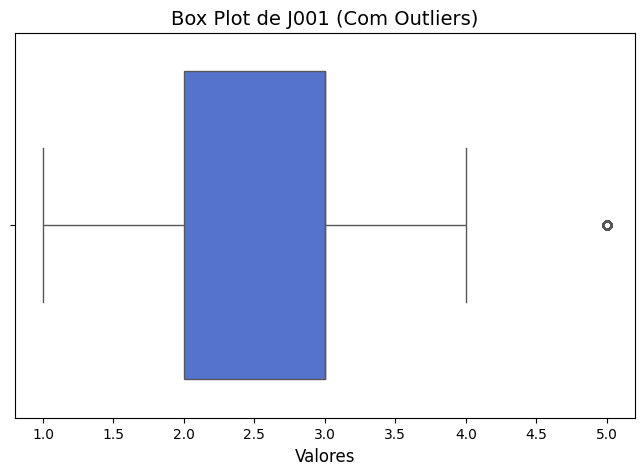

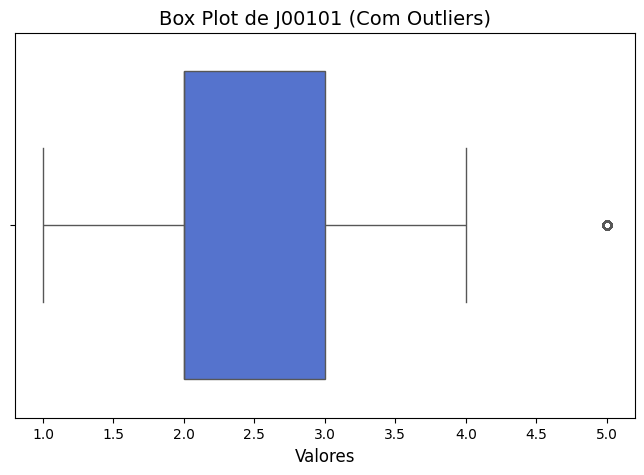

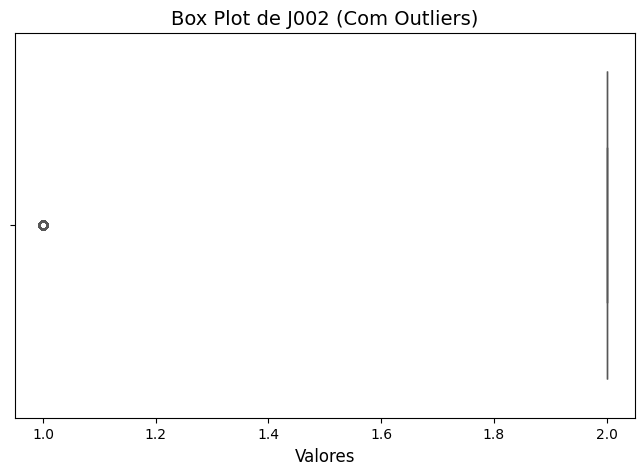

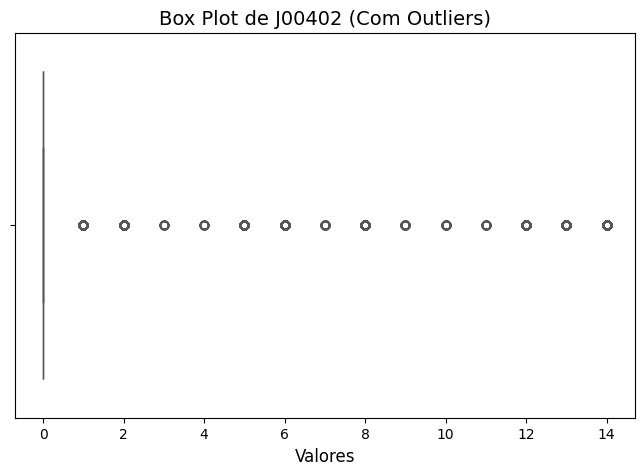

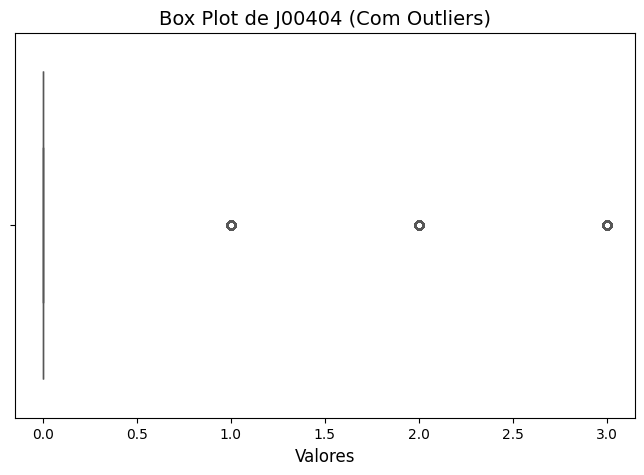

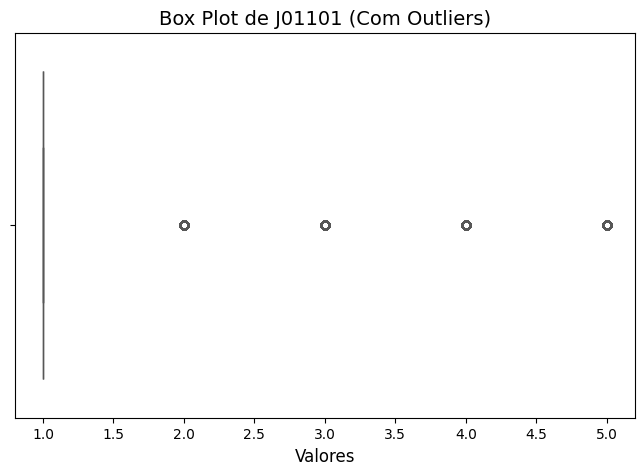

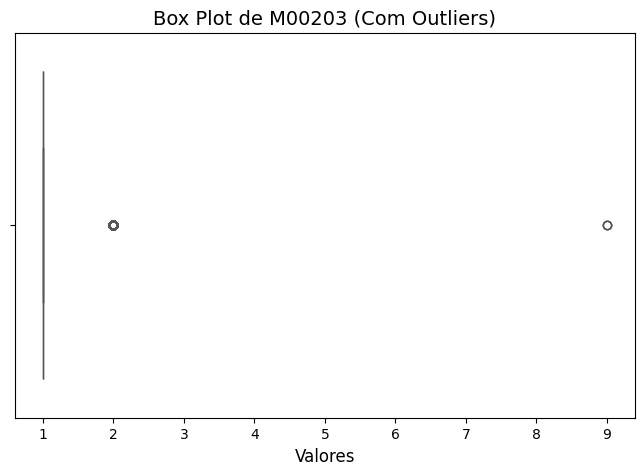

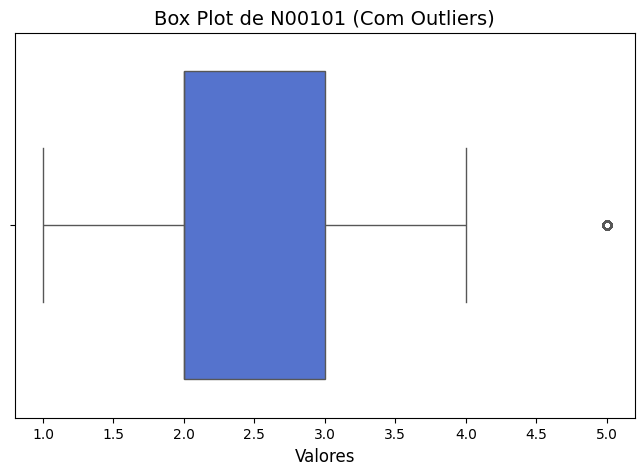

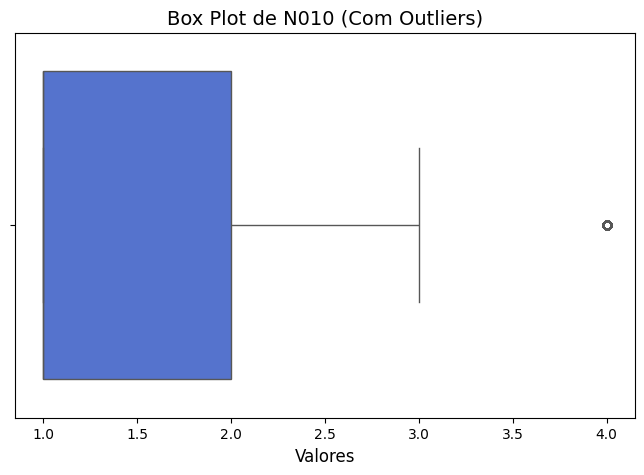

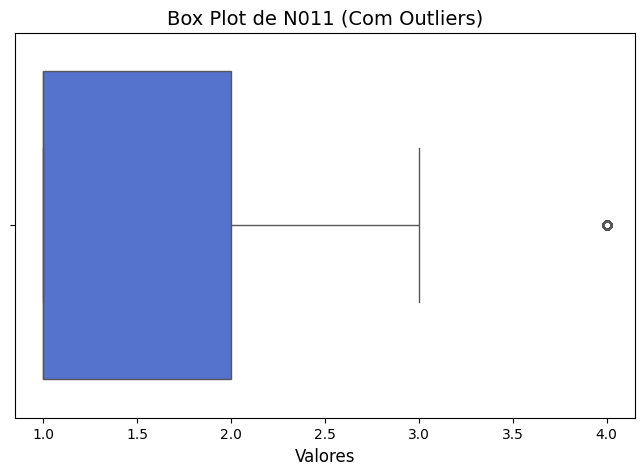

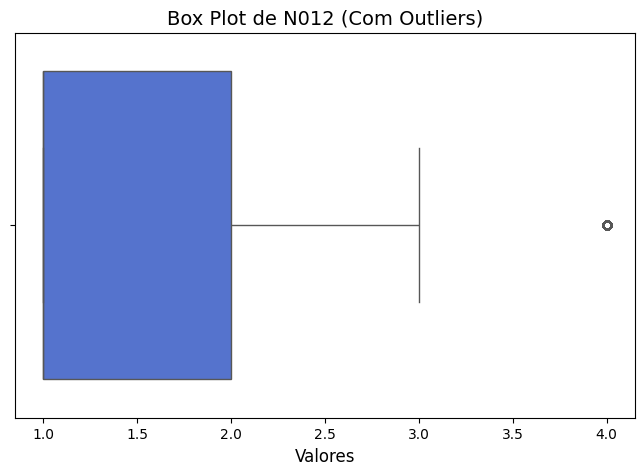

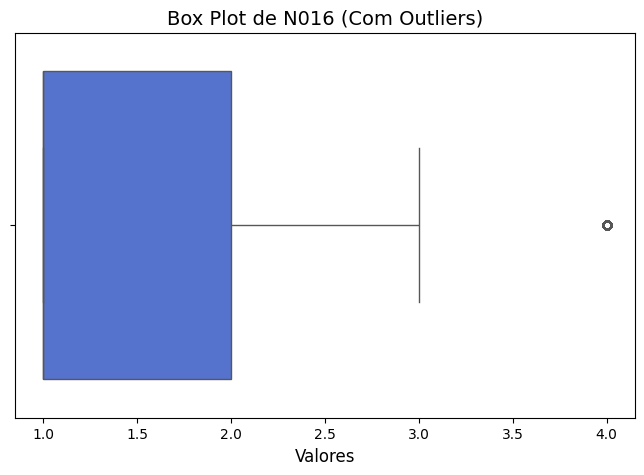

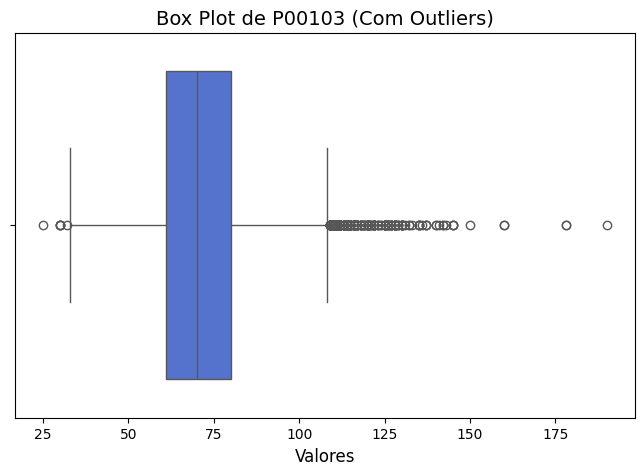

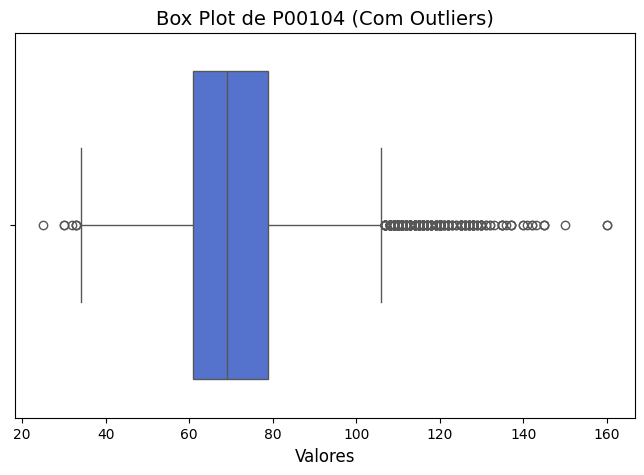

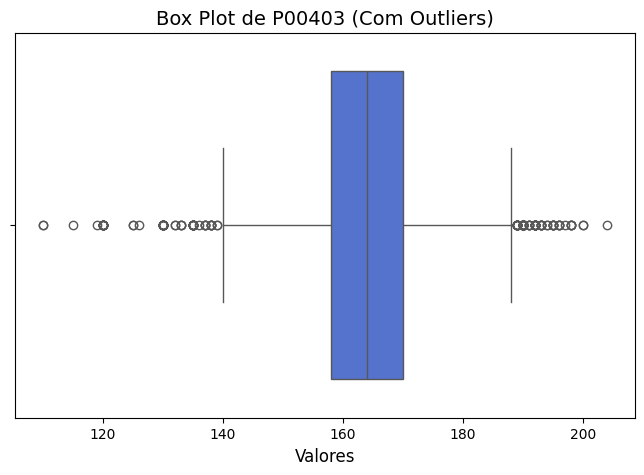

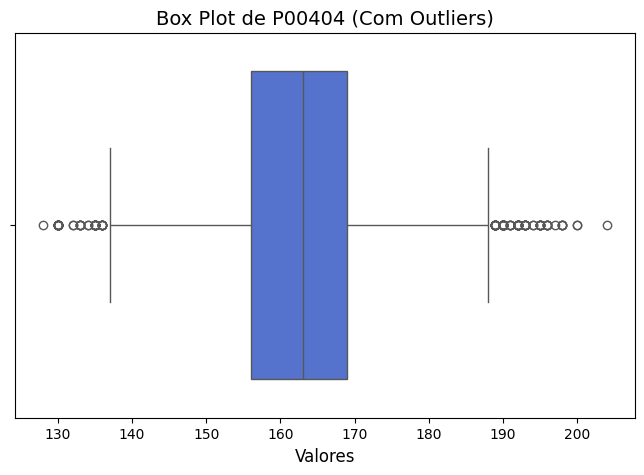

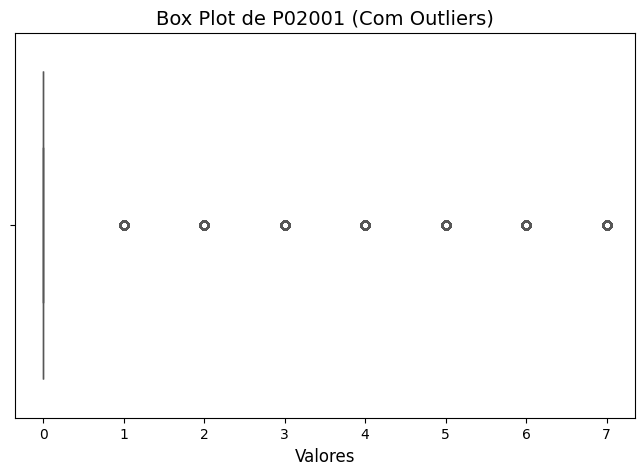

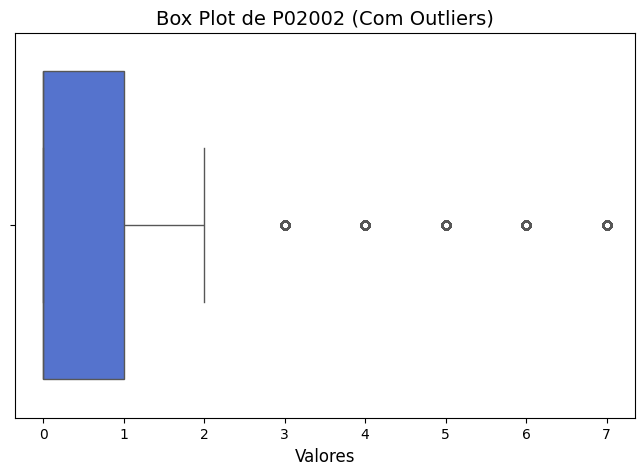

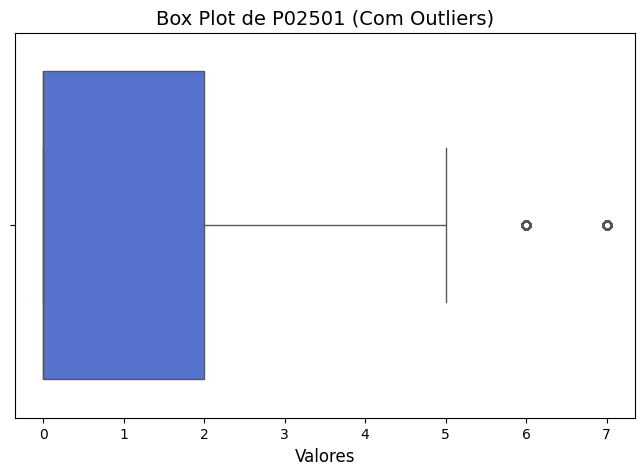

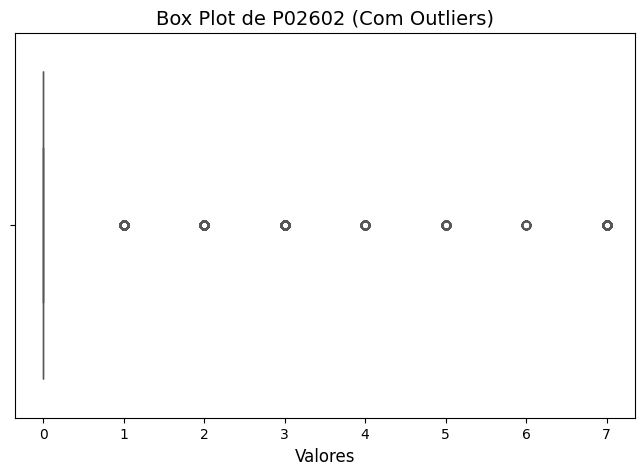

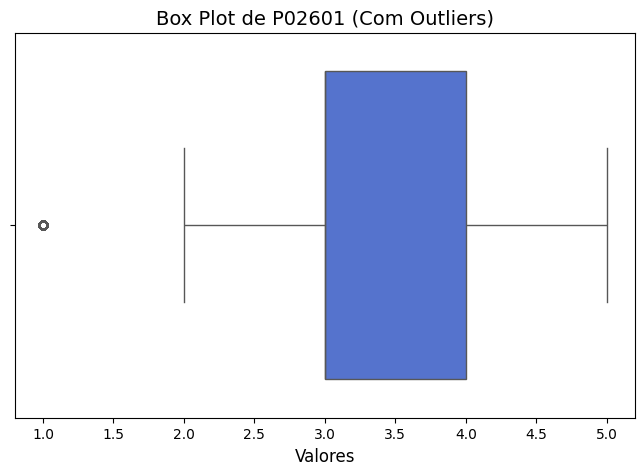

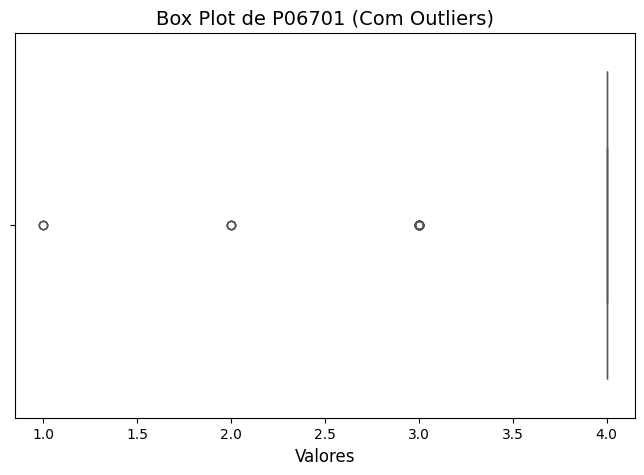

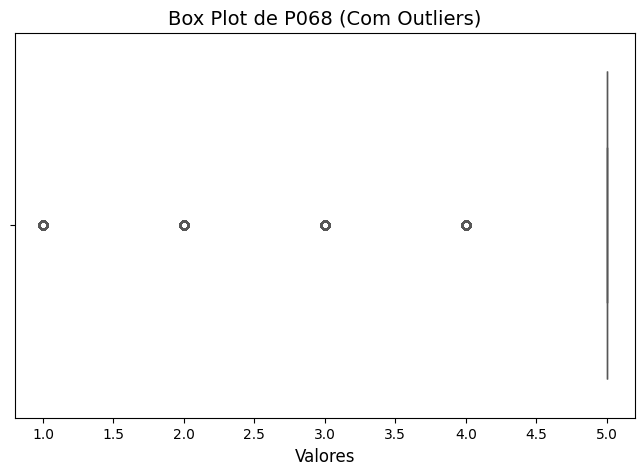

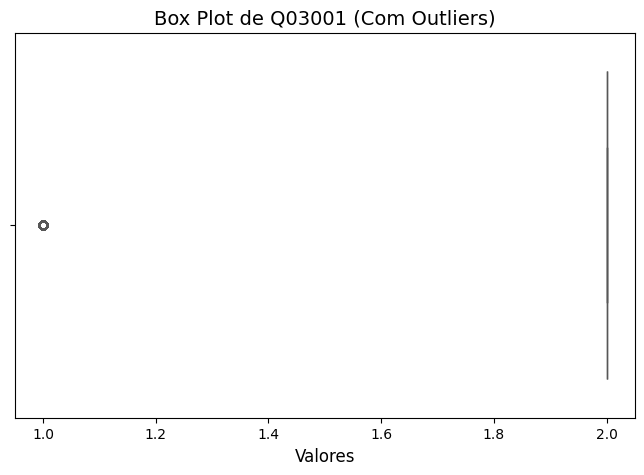

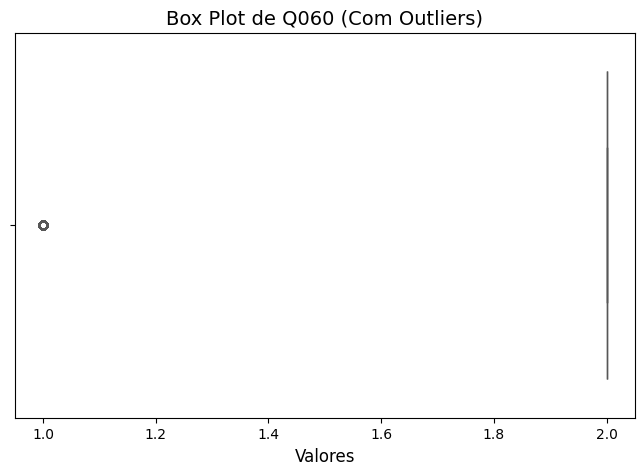

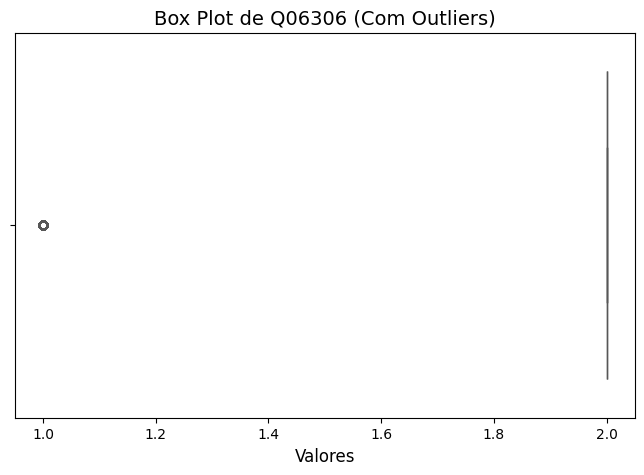

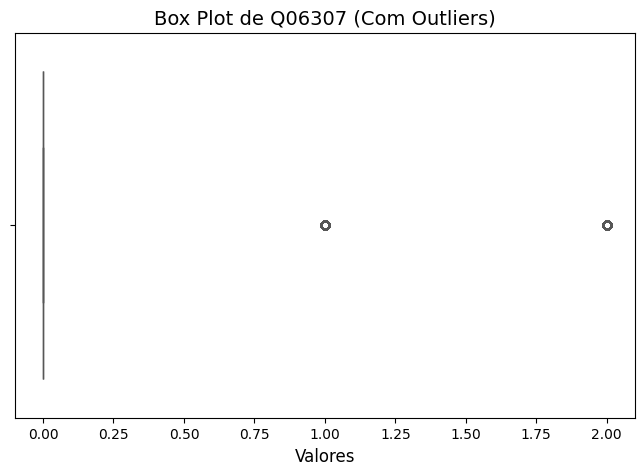

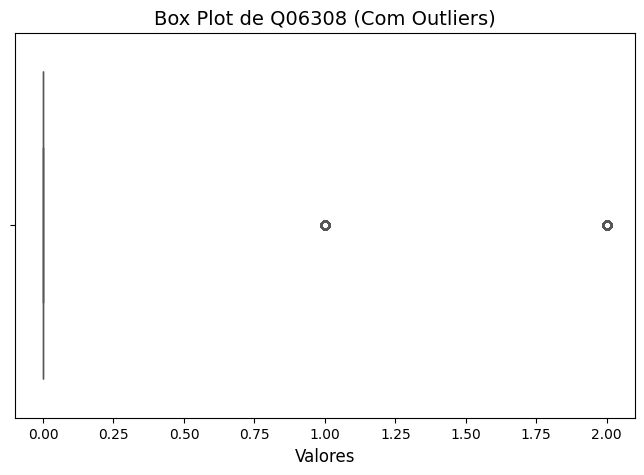

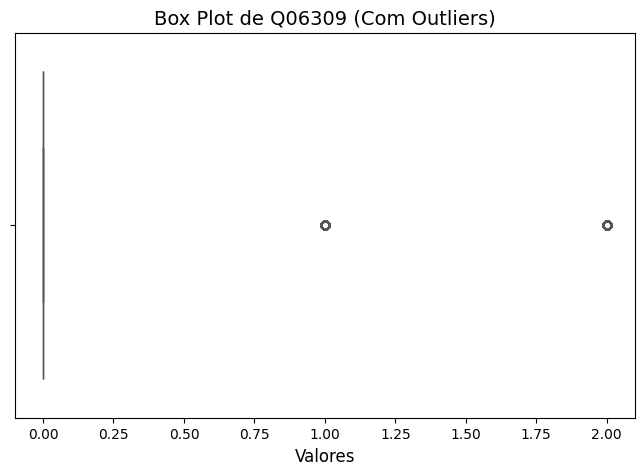

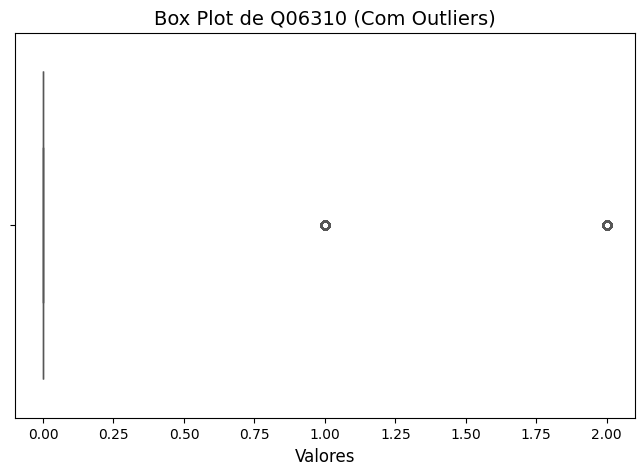

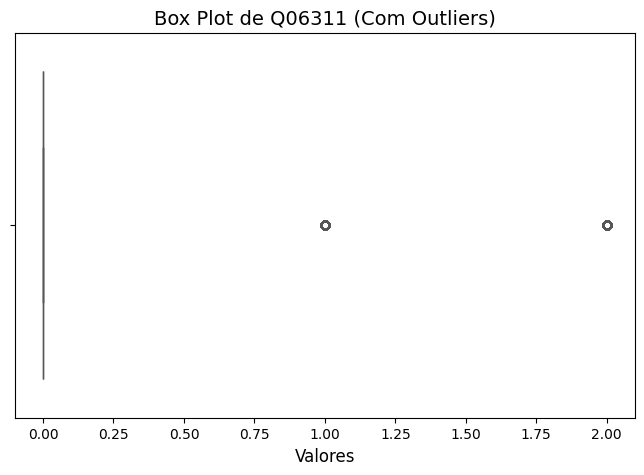

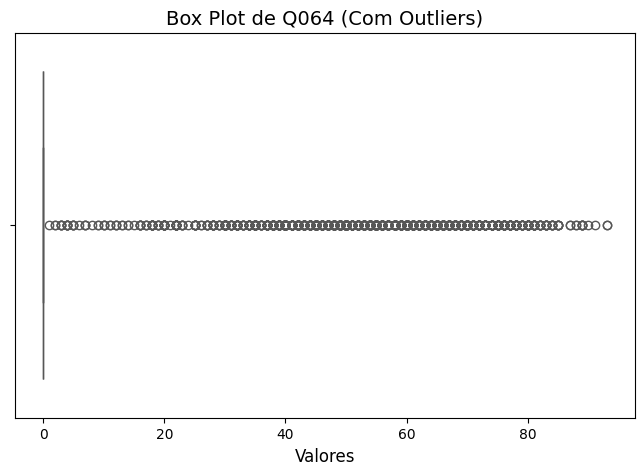

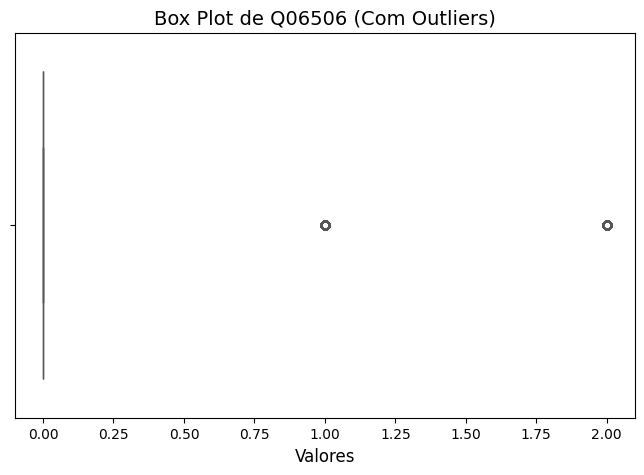

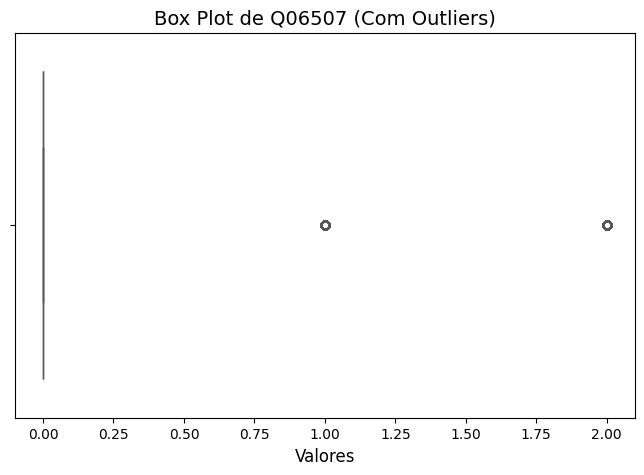

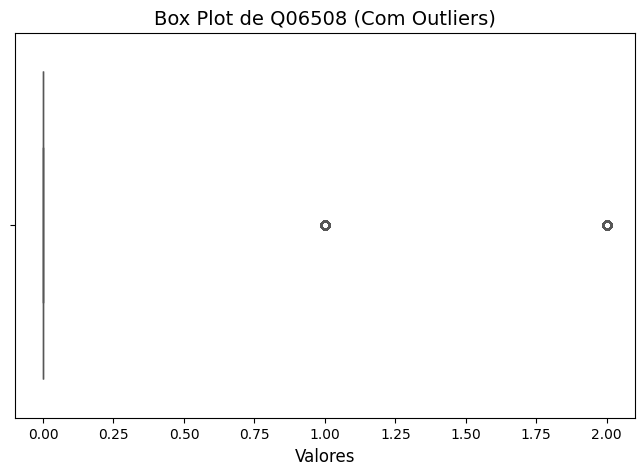

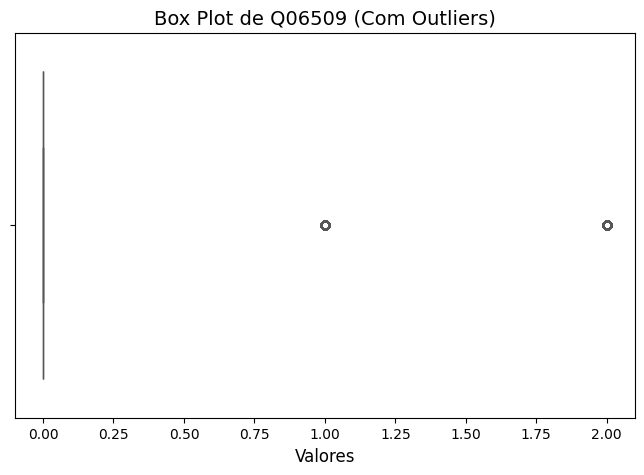

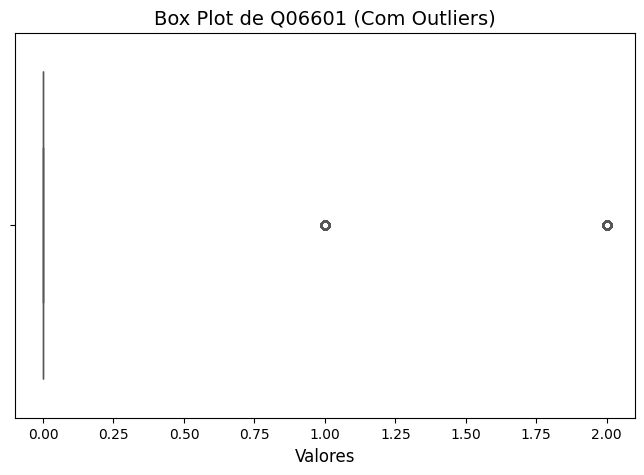

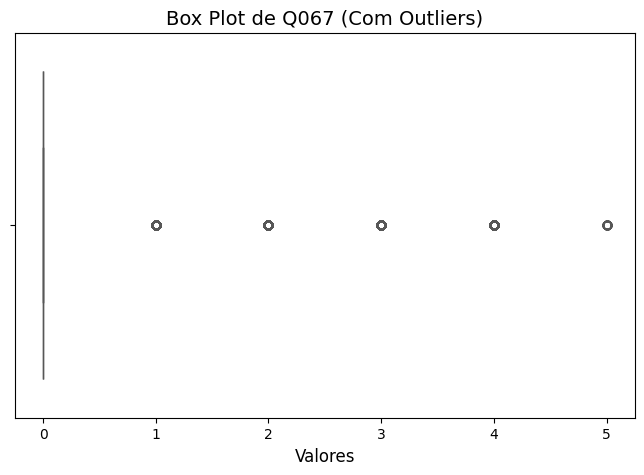

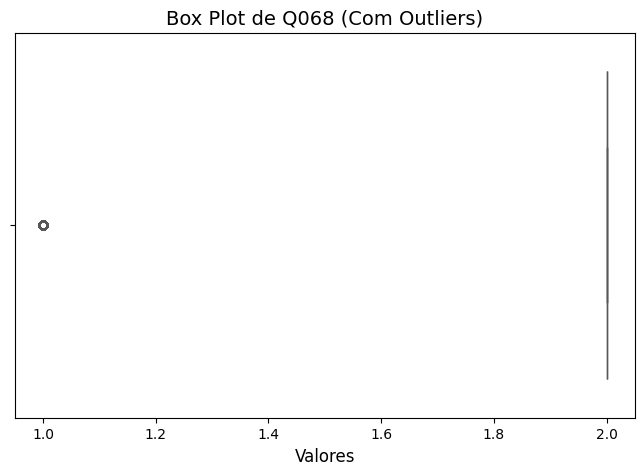

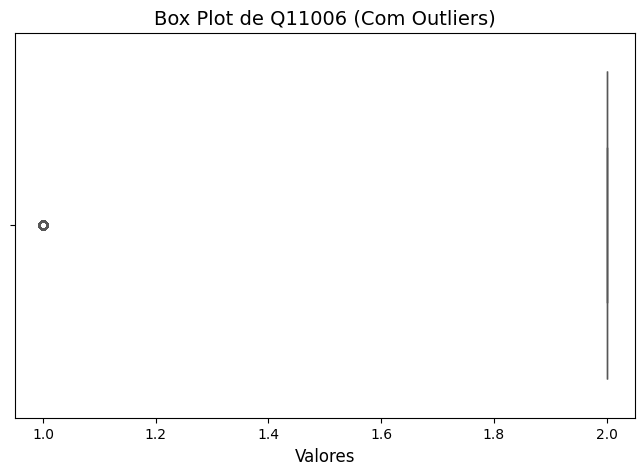

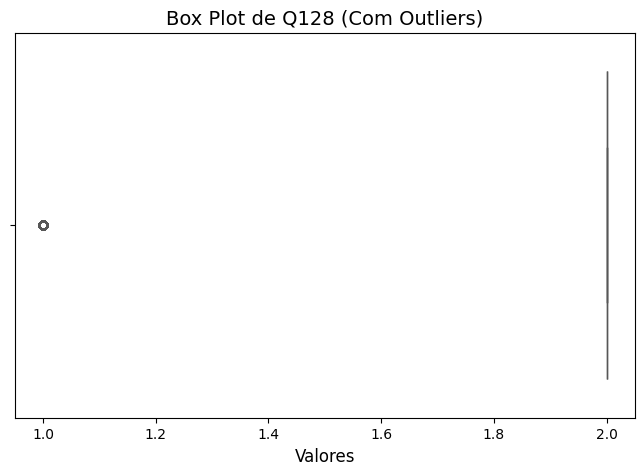

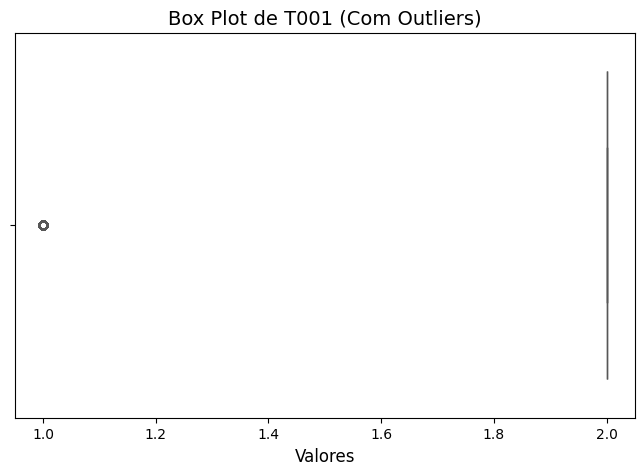

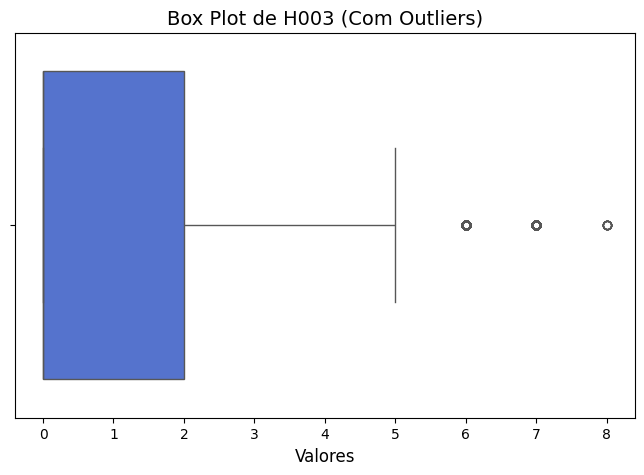

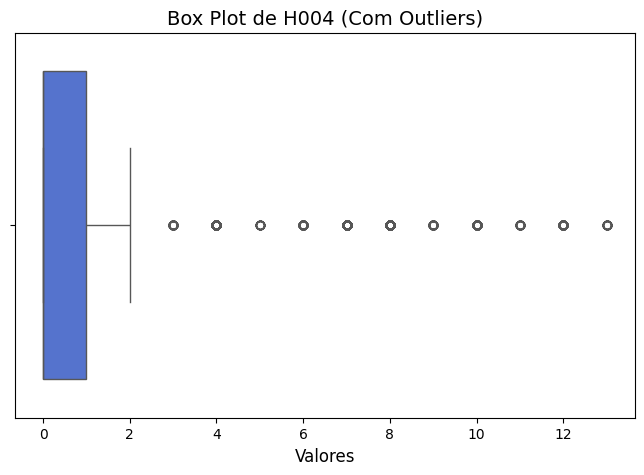

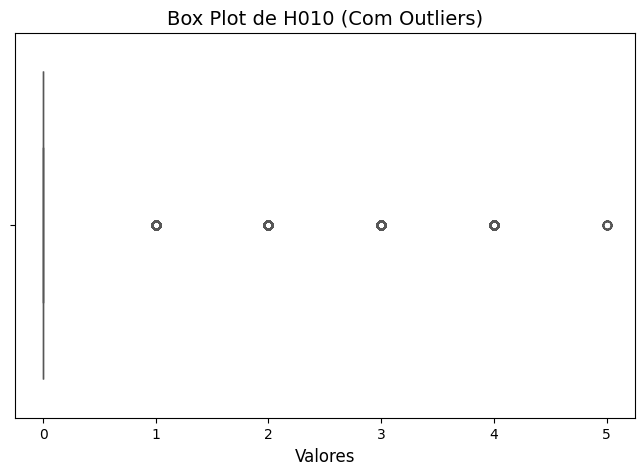

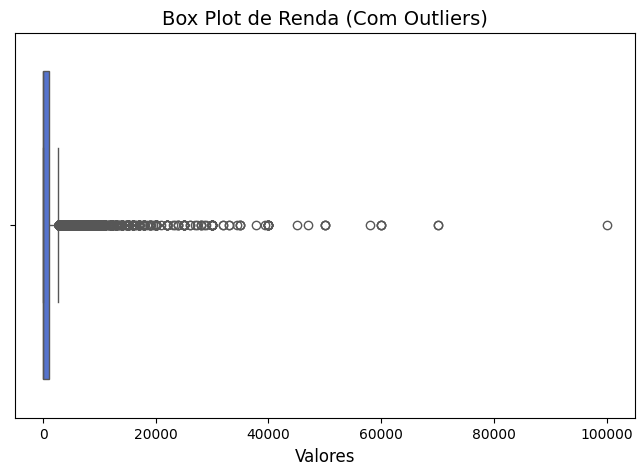

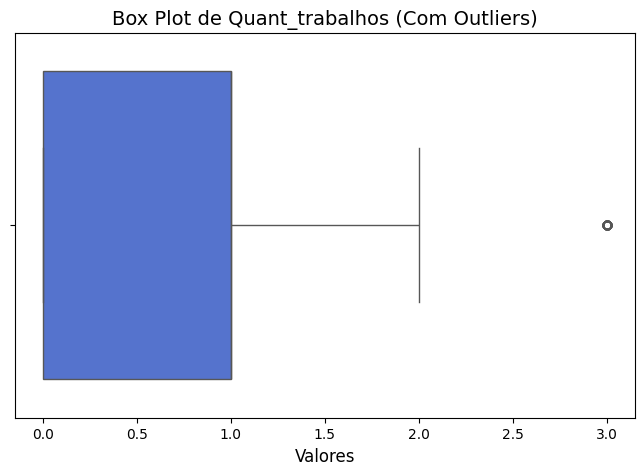

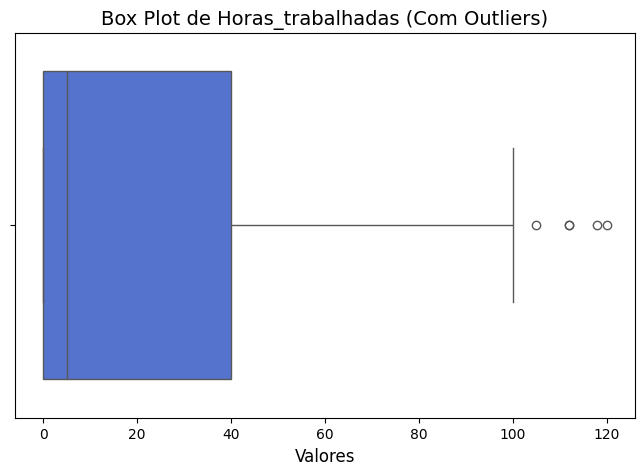

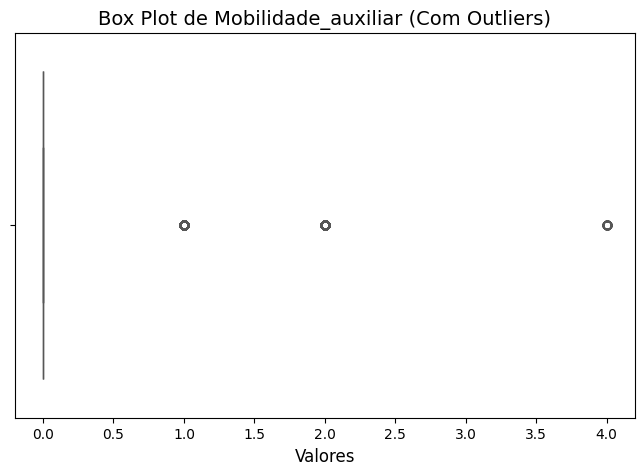

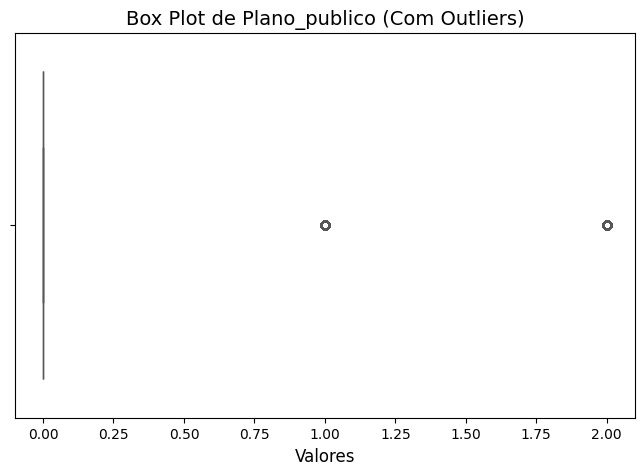

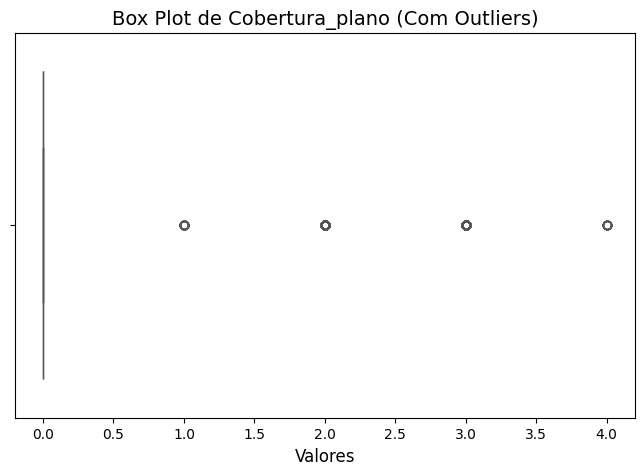

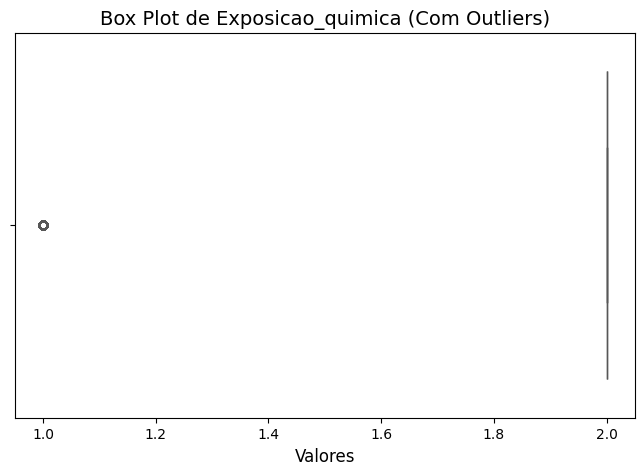

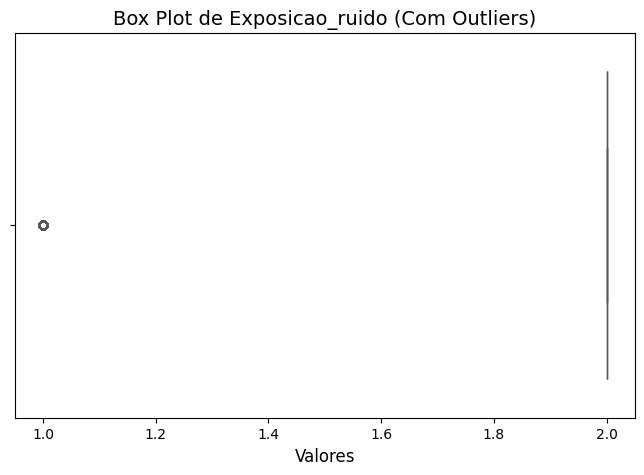

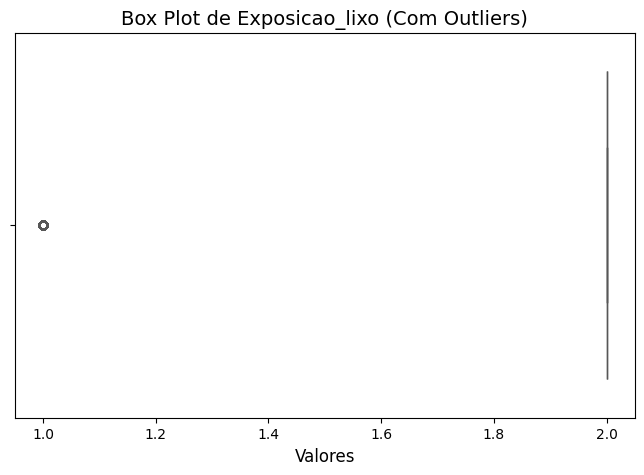

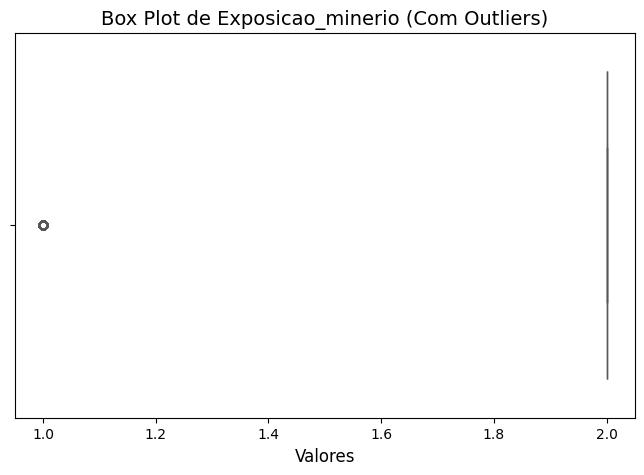

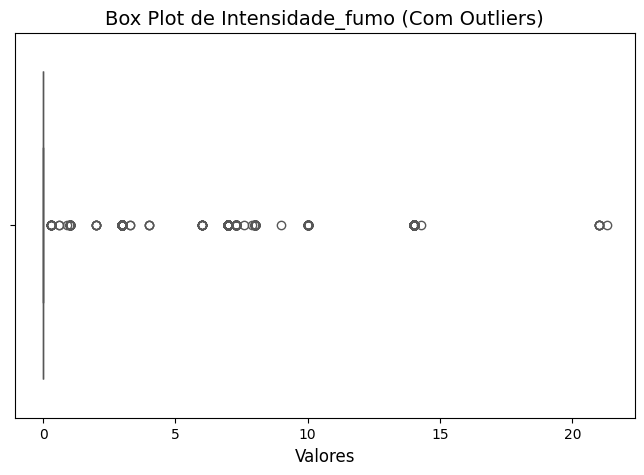

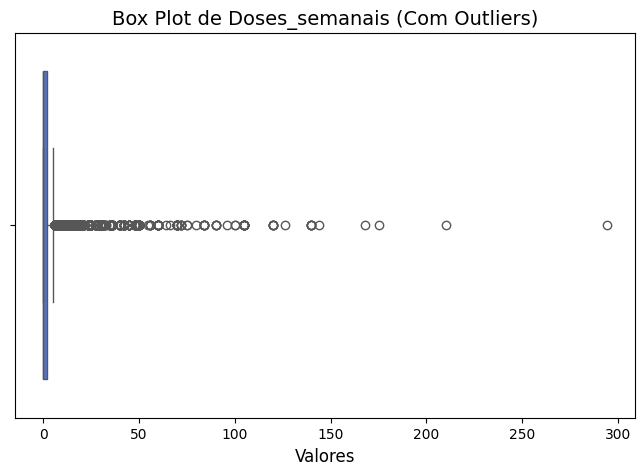

Gráficos salvos na pasta 'Imagens'!


In [3]:
# Selecionar colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Criar a pasta 'Imagens' se não existir
os.makedirs('Imagens', exist_ok=True)

# Função para detectar outliers em uma coluna
def tem_outliers(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return any((serie < limite_inferior) | (serie > limite_superior))

# Filtrar colunas que têm outliers
colunas_com_outliers = [col for col in colunas_numericas if tem_outliers(df[col])]

print(f"Colunas com outliers: {colunas_com_outliers}")

# Gerar e salvar box plots apenas para colunas com outliers
for coluna in colunas_com_outliers:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=coluna, color='royalblue')
    plt.title(f'Box Plot de {coluna} (Com Outliers)', fontsize=14)
    plt.xlabel('Valores', fontsize=12)
    
    # Salvar o gráfico
    caminho_imagem = f'Imagens/boxplot_{coluna}.png'
    plt.savefig(caminho_imagem, dpi=300, bbox_inches='tight')
    plt.show()

print(f"Gráficos salvos na pasta 'Imagens'!")

In [4]:
# Criar um dicionário de mapeamento (coluna -> significado)
mapeamento = dict(zip(dic.iloc[:, 0], dic.iloc[:, 1]))

# Selecionar colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Função para contar outliers
def contar_outliers(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    li, ls = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = serie[(serie < li) | (serie > ls)]
    return len(outliers)

# Processar todas as colunas
resultados = []
for coluna in colunas_numericas:
    n_outliers = contar_outliers(df[coluna])
    significado = mapeamento.get(coluna, 'Descrição não encontrada')
    resultados.append({
        'Coluna': coluna,
        'Significado': significado,
        'Total Outliers': n_outliers,
        '% do Total': f"{(n_outliers/len(df))*100:.2f}%"
    })

# Criar DataFrame e ordenar
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('Total Outliers')

# Exibir e salvar resultados
print("\nCONTAGEM DE OUTLIERS (ORDEM CRESCENTE):")
print(df_resultados.to_string(index=False, justify='left'))

df_resultados.to_csv('Imagens/contagem_outliers_com_significado.csv', index=False, encoding='utf-8-sig')
print("\nArquivo salvo em 'Imagens/contagem_outliers_com_significado.csv'")


CONTAGEM DE OUTLIERS (ORDEM CRESCENTE):
Coluna              Significado                                                                                                                                                                                                                                                        Total Outliers % do Total
              V0026                                                                                                                                                                                                                                       Tipo de situação censitária    0             0.00%    
              V0031                                                                                                                                                                                                                                                      Tipo de área    0             0.00%    
               B001                         